# Regresión logística multiple

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('DataReg.csv', header = 0) # Leemos el dataset final generado por el notebook M02_05

In [3]:
df.head()

,precio,area_resid,cal_aire,num_hab,edad,prof_mil,p-pobreza,n_cam_hos,n_hab_hotel,lluvia_ano,parque,Vendida,prom_dist,aeropuerto_SI,cuerpo_agua_Lago,cuerpo_agua_Lago y rio,cuerpo_agua_Rio
0,24.0,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,0.049347,0,4.0875,1,0,0,1
1,21.6,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,0.046146,1,4.9675,0,1,0,0
2,34.7,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,0.045764,0,4.9675,0,0,0,0
3,33.4,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,0.047151,0,6.0650,1,1,0,0
4,36.2,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,0.039474,0,6.0625,0,1,0,0


## Creación de los set de entrenamiento y validación, modelado

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [5]:
X = df.loc[:, df.columns != 'Vendida']
y = df['Vendida']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123) # Obtener los cuatro
# conjuntos de datos necesarios para el modelo

In [7]:
reg_model = LogisticRegression(max_iter = 900) # Crear el modelo aumentando las iteraciones dado que no se llega
# a ajustar el modelo con menos iteraciones

In [8]:
reg_model.fit(X_train, y_train) # Ajustar el modelo a los datos

LogisticRegression(max_iter=900)

In [9]:
reg_model.intercept_ # Intercepto theta(0)

array([-2.67910644])

In [10]:
reg_model.coef_.reshape(-1,4) # Coeficiente de las variables predictoras

array([[-0.2656961 ,  0.01086472, -1.38371538,  0.98830839],
       [-0.00402203,  0.30360361, -0.21857159,  0.19075335],
       [-0.07170099, -0.0097345 , -0.05253779, -0.32562462],
       [-0.21087867, -0.0351414 , -0.04254725,  0.39430661]])

In [11]:
import statsmodels.api as sn
import statsmodels.discrete.discrete_model as sm

In [12]:
const_X = sn.add_constant(X_train) # Crear la columna con la constante solicitada para el modelo Logit

In [13]:
logit = sm.Logit(y_train, const_X).fit()

Optimization terminated successfully.
         Current function value: 0.541711
         Iterations 6


In [14]:
logit.summary() # Ver estadisticos y los valores de los parámetros de las variables predictoras

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Vendida   No. Observations:                  404
Model:                          Logit   Df Residuals:                      387
Method:                           MLE   Df Model:                           16
Date:                Mon, 19 Jul 2021   Pseudo R-squ.:                  0.2140
Time:                        21:18:28   Log-Likelihood:                -218.85
converged:                       True   LL-Null:                       -278.43
Covariance Type:            nonrobust   LLR p-value:                 8.008e-18
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -2.9938      3.026     -0.989      0.323      -8.926       2.938
precio                    -0.2954      0.039     -7.586      0.000      -0.372      -0.219
area_resid                 0.0377      0.030      1.266      0.205      -0.021       0.096
cal_aire                 -10.0015      3.075     -3.253      0.001     -16.027      -3.975
num_hab                    1.1678      0.318      3.675      0.000       0.545       1.791
edad                   -9.471e-06      0.008     -0.001      0.999      -0.015       0.015
prof_mil                   0.3761      0.075      5.034      0.000       0.230       0.523
p-pobreza                 -0.2184      0.039     -5.560      0.000      -0.295      -0.141
n_cam_hos                  0.1842      0.082      2.241      0.025       0.023       0.345
n_hab_hotel               -0.0693      0.054     -1.286      0.198      -0.175       0.036
lluvia_ano                -0.0067      0.010     -0.684      0.494      -0.026       0.012
parque                    37.6171     28.183      1.335      0.182     -17.620      92.854
prom_dist                 -0.4465      0.111     -4.023      0.000      -0.664      -0.229
aeropuerto_SI             -0.2739      0.240     -1.139      0.255      -0.745       0.197
cuerpo_agua_Lago          -0.0776      0.343     -0.226      0.821      -0.751       0.596
cuerpo_agua_Lago y rio    -0.0395      0.394     -0.100      0.920      -0.811       0.732
cuerpo_agua_Rio            0.4638      0.293      1.582      0.114      -0.111       1.039
==========================================================================================
"""

In [15]:
columnas = ['edad', 'cuerpo_agua_Lago', 'cuerpo_agua_Lago y rio'] # Se eliminan los atributos con valores por encima de
# la significancia de los parámetros

const_X = const_X.drop(columns = columnas)

logit1 = sm.Logit(y_train, const_X).fit()
logit1.summary()

Optimization terminated successfully.
         Current function value: 0.541775
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Vendida   No. Observations:                  404
Model:                          Logit   Df Residuals:                      390
Method:                           MLE   Df Model:                           13
Date:                Mon, 19 Jul 2021   Pseudo R-squ.:                  0.2139
Time:                        21:18:28   Log-Likelihood:                -218.88
converged:                       True   LL-Null:                       -278.43
Covariance Type:            nonrobust   LLR p-value:                 3.037e-19
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.9990      3.021     -0.993      0.321      -8.919       2.921
precio             -0.2955      0.039     -7.601      0.000      -0.372      -0.219
area_resid          0.0377      0.030      1.270      0.204      -0.020       0.096
cal_aire           -9.9819      3.046     -3.277      0.001     -15.953      -4.011
num_hab             1.1673      0.310      3.763      0.000       0.559       1.775
prof_mil            0.3751      0.074      5.040      0.000       0.229       0.521
p-pobreza          -0.2192      0.038     -5.836      0.000      -0.293      -0.146
n_cam_hos           0.1829      0.082      2.243      0.025       0.023       0.343
n_hab_hotel        -0.0695      0.054     -1.294      0.196      -0.175       0.036
lluvia_ano         -0.0068      0.010     -0.699      0.484      -0.026       0.012
parque             37.8543     28.155      1.345      0.179     -17.328      93.036
prom_dist          -0.4467      0.103     -4.339      0.000      -0.648      -0.245
aeropuerto_SI      -0.2759      0.239     -1.152      0.249      -0.745       0.193
cuerpo_agua_Rio     0.4971      0.246      2.024      0.043       0.016       0.979
===================================================================================
"""

In [16]:
columnas = ['lluvia_ano', 'area_resid', 'aeropuerto_SI']

const_X = const_X.drop(columns = columnas)

logit2 = sm.Logit(y_train, const_X).fit()
logit2.summary()

Optimization terminated successfully.
         Current function value: 0.546263
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Vendida   No. Observations:                  404
Model:                          Logit   Df Residuals:                      393
Method:                           MLE   Df Model:                           10
Date:                Mon, 19 Jul 2021   Pseudo R-squ.:                  0.2074
Time:                        21:18:28   Log-Likelihood:                -220.69
converged:                       True   LL-Null:                       -278.43
Covariance Type:            nonrobust   LLR p-value:                 4.189e-20
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.4747      2.656     -0.555      0.579      -6.680       3.730
precio             -0.3014      0.039     -7.747      0.000      -0.378      -0.225
cal_aire           -9.2258      2.962     -3.115      0.002     -15.030      -3.421
num_hab             1.1390      0.307      3.706      0.000       0.537       1.741
prof_mil            0.3570      0.072      4.982      0.000       0.217       0.497
p-pobreza          -0.2163      0.037     -5.854      0.000      -0.289      -0.144
n_cam_hos           0.1809      0.081      2.237      0.025       0.022       0.339
n_hab_hotel        -0.0743      0.057     -1.313      0.189      -0.185       0.037
parque             38.8342     27.889      1.392      0.164     -15.826      93.495
prom_dist          -0.4795      0.099     -4.822      0.000      -0.674      -0.285
cuerpo_agua_Rio     0.4775      0.244      1.960      0.050    2.13e-05       0.955
===================================================================================
"""

In [17]:
columnas = ['n_hab_hotel', 'parque']

const_X = const_X.drop(columns = columnas)

logit3 = sm.Logit(y_train, const_X).fit()
logit3.summary()

Optimization terminated successfully.
         Current function value: 0.551369
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Vendida   No. Observations:                  404
Model:                          Logit   Df Residuals:                      395
Method:                           MLE   Df Model:                            8
Date:                Mon, 19 Jul 2021   Pseudo R-squ.:                  0.2000
Time:                        21:18:28   Log-Likelihood:                -222.75
converged:                       True   LL-Null:                       -278.43
Covariance Type:            nonrobust   LLR p-value:                 2.015e-20
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.9879      2.507     -0.793      0.428      -6.902       2.926
precio             -0.3023      0.039     -7.779      0.000      -0.378      -0.226
cal_aire           -6.0062      1.824     -3.293      0.001      -9.581      -2.432
num_hab             1.1296      0.305      3.703      0.000       0.532       1.727
prof_mil            0.3584      0.072      5.001      0.000       0.218       0.499
p-pobreza          -0.2171      0.037     -5.875      0.000      -0.290      -0.145
n_cam_hos           0.1761      0.081      2.187      0.029       0.018       0.334
prom_dist          -0.4856      0.100     -4.880      0.000      -0.681      -0.291
cuerpo_agua_Rio     0.4876      0.242      2.016      0.044       0.014       0.962
===================================================================================
"""

## Rendimiento del modelo

In [18]:
# Lista con los valores de los atributos finales del modelo
col_final = ['precio', 'cal_aire', 'num_hab', 'prof_mil', 'p-pobreza', 'n_cam_hos', 'prom_dist', 'cuerpo_agua_Rio']

In [19]:
X_test = sn.add_constant(X_test[col_final]) # Agregar columna de la constante para poder aplicar el modelo Logit
y_pred_train = logit3.predict(const_X)
y_pred_train

203    0.048505
441    0.292603
172    0.582527
95     0.773022
54     0.121675
         ...   
98     0.149341
476    0.522887
322    0.651095
382    0.447391
365    0.019508
Length: 404, dtype: float64

In [20]:
y_pred_train = y_pred_train.apply(lambda x: 1 if x > 0.5 else 0) # Como las predicciones están dadas en probabilidades
# se convierten a uno las que esten por encima de 0.5, de lo contrario la clase es 0
y_pred_train

203    0
441    0
172    1
95     1
54     0
      ..
98     0
476    1
322    1
382    0
365    0
Length: 404, dtype: int64

In [21]:
y_pred_test = logit3.predict(X_test) # realizar las predicciones en el conjunto de validación

In [22]:
y_pred_test = y_pred_test.apply(lambda x: 1 if x > 0.5 else 0)

In [23]:
y_pred_test

410    1
85     1
280    0
422    0
199    0
      ..
229    0
159    1
196    1
345    0
467    0
Length: 102, dtype: int64

### Exactitud *(Accuracy)*

In [24]:
from sklearn.metrics import accuracy_score # Modulo para realizar la métrica de la exactitud

In [25]:
accuracy_ent = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print('Exactitud del modelo con datos de entrenamiento: ', accuracy_ent)
print('Exactitud del modelo con datos de validación: ', accuracy_test)

Exactitud del modelo con datos de entrenamiento:  0.6856435643564357
Exactitud del modelo con datos de validación:  0.6372549019607843


In [26]:
reg_model.fit(X_train[col_final], y_train).score(X_test[col_final], y_test)

0.6764705882352942

### Matriz de confusión

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_pred_train)

array([[155,  65],
       [ 62, 122]], dtype=int64)

In [28]:
confusion_matrix(y_test, y_pred_test)

array([[36, 20],
       [17, 29]], dtype=int64)

In [31]:
# Si se desea trabajar con las probabilidades de sklearn se usa la función predic_proba()
# e igualmente se puede manipular el umbral de decisión de la clase
y_pred_sk = (reg_model.predict_proba(X_train[col_final])[:, 1]>0.3)
confusion_matrix(y_pred_train, y_pred_sk)

array([[115, 102],
       [  0, 187]], dtype=int64)

In [32]:
confusion_matrix(y_train, y_pred_sk)

array([[100, 120],
       [ 15, 169]], dtype=int64)

### Otras métricas (Precisión, Recall, AUC)

In [33]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

In [34]:
precision_score(y_train, y_pred_train)

0.6524064171122995

In [35]:
recall_score(y_train, y_pred_train)

0.6630434782608695

In [36]:
roc_auc_score(y_train, y_pred_train)

0.6837944664031621

In [40]:
x_roc, y_roc, _ = roc_curve(y_test, reg_model.predict_proba(X_test[col_final])[:, 1]) # Devuelve tres valores
# Tasas de falsos positivos, Tasas de verdaderos positivos, umbrales

Text(0, 0.5, 'Tasa de Verdaderos Positivos')

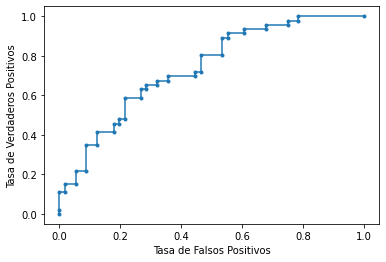

In [38]:
plt.plot(x_roc, y_roc, marker = '.', label = 'Curva ROC modelo de Regresión logística')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')